# Logistic Regression with Iris

## Content
* Content
* Logistic Regression
* Data
    * Iris Species
    * Libraries
    * Reading Data
    * Visualization and Understanding
        * Difference analysis between Seabon and species
        * Difference analysis between Plotly and species
    * Data Editing
    
    
* Logistic Regression
    * Normalization
    * Train Test Split
    * Parameter İnitialize
    * Sigmoid function
    * Cost, gradient
    * Update Parameter
    * Predict
    * Logistic Regression with Math
    * Sklearn with LR
* Reference

# Logistic Regression

In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Wikipedia

![](https://storage.ning.com/topology/rest/1.0/file/get/2808358994?profile=original)

# Iris Species

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

https://www.kaggle.com/uciml/iris

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

# Data

## Libraries

In [480]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


## Reading Data

In [481]:
data = pd.read_csv("../input/iris/Iris.csv")

In [482]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [483]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [484]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [485]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [486]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Visualization and Understanding

### Difference analysis between seabon and species

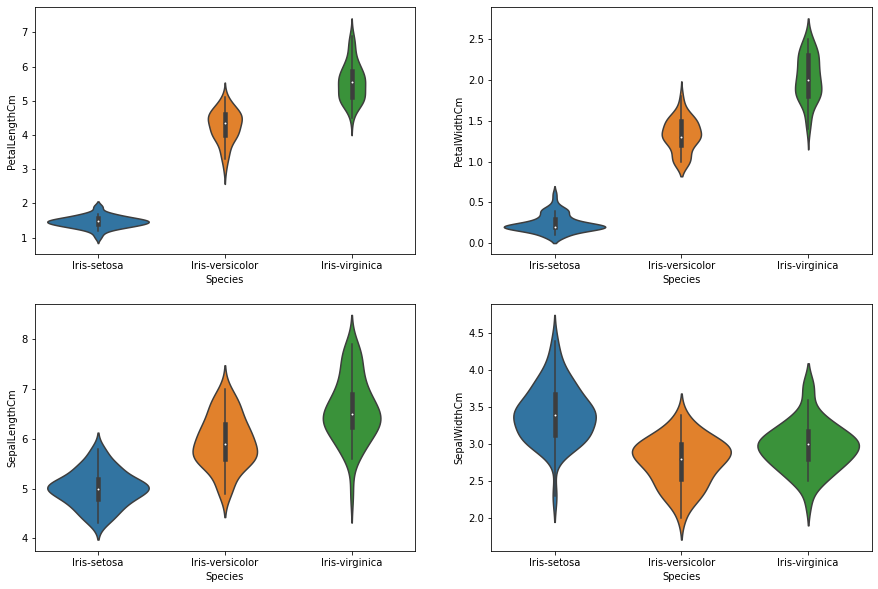

In [487]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(data=data, x='Species',y='PetalLengthCm')
plt.subplot(2,2,2)
sns.violinplot(data=data, x='Species',y='PetalWidthCm')
plt.subplot(2,2,3)
sns.violinplot(data=data, x='Species',y='SepalLengthCm')
plt.subplot(2,2,4)
sns.violinplot(data=data, x='Species',y='SepalWidthCm')


### Difference analysis between Plotly and species

In [488]:
dataSetosa = data[data.Species == 'Iris-setosa'] 
dataVersicolor = data[data.Species == 'Iris-versicolor']
dataVirginica = data[data.Species == 'Iris-virginica']

trace1 = go.Box(
    y=dataSetosa.SepalLengthCm,
    name = 'Setosa',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace2 = go.Box(
    y=dataVersicolor.SepalLengthCm,
    name = 'Versicolor',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)

trace3 = go.Box(
    y=dataVirginica.SepalLengthCm,
    name = 'Virginica',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)

data1 = [trace1,trace2, trace3]
iplot(data1)

### Difference analysis between seabon and species

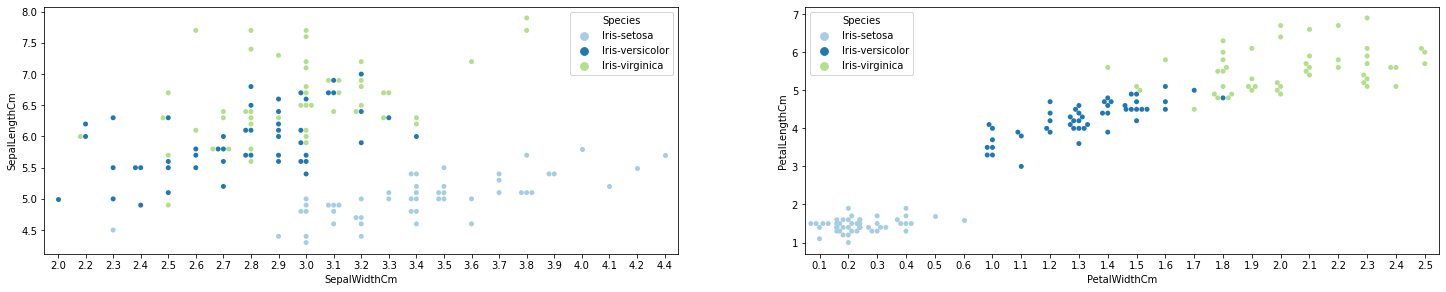

In [489]:
plt.figure(figsize = (25,10))

plt.subplot(2,2,1)
sns.swarmplot(x="SepalWidthCm", y="SepalLengthCm", hue="Species",data = data, palette="Paired")
plt.subplot(2,2,2)
sns.swarmplot(x="PetalWidthCm", y="PetalLengthCm", hue="Species",data = data, palette="Paired")


* Görselleştirmeler sonucunda Versicolor ve Virginica değerlerine logistic regression modeli oluşturmaya karar verdik. Çünkü Setosa değerlerini göz ile de tespit etmek kolay. Gelin verimizi düzenleyelim ve algoritmamızı oluşturalım.

## Data Editing

In [490]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [491]:
dataSetosa = data[data.Species == 'Iris-setosa'] 
dataVersicolor = data[data.Species == 'Iris-versicolor']
dataVirginica = data[data.Species == 'Iris-virginica']


new_data = pd.concat([dataVersicolor,dataVirginica])
new_data = new_data.reset_index() 
new_data

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,50,51,7.0,3.2,4.7,1.4,Iris-versicolor
1,51,52,6.4,3.2,4.5,1.5,Iris-versicolor
2,52,53,6.9,3.1,4.9,1.5,Iris-versicolor
3,53,54,5.5,2.3,4.0,1.3,Iris-versicolor
4,54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...,...
95,145,146,6.7,3.0,5.2,2.3,Iris-virginica
96,146,147,6.3,2.5,5.0,1.9,Iris-virginica
97,147,148,6.5,3.0,5.2,2.0,Iris-virginica
98,148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [492]:
# Kullanmadığımız columnsları drop edelim
# axis = 1 : tüm bir columns
# inplace : Drop et ve datanın içine kaydet
new_data.drop(["index","Id"], axis=1,inplace = True)
new_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor


In [493]:
# String barındıran columns değerimizi değiştirdik
new_data.Species = [1 if each == "Iris-versicolor" else 0 for each in new_data.Species]
new_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [494]:
y = new_data.Species.values
x_data = new_data.drop(["Species"], axis=1) # Species değerlerimizin olmadığı bir veri seti

x_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,7.0,3.2,4.7,1.4
1,6.4,3.2,4.5,1.5
2,6.9,3.1,4.9,1.5
3,5.5,2.3,4.0,1.3
4,6.5,2.8,4.6,1.5


# Logistic Regression

## Normalization

In [495]:
# (x - x(min)/(max(x)- min(x))

# All columns must be in the range 0 to 1. Features should not differ greatly between them.

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

## Train Test Split

In [496]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 16)

# Transpoz process
x_train = x_train.T
x_test = x_test.T#
y_train = y_train.T
y_test = y_test.T


# shape values
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


x_train:  (4, 80)
x_test:  (4, 20)
y_train:  (80,)
y_test:  (20,)


## Parameter İnitialize

In [497]:
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01) # Create values with 0.01 values
    
    b = 0.0 
    
    # These numbers are usually selected when using w and b.
    
    return w,b


![](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvI8vNq_N7u3RWVAPLk%2F-LvJSdcFXzoI-WW0L3w5%2Fimage.png?alt=media&token=84526dc6-4634-4de5-aacf-00a179afac76)

## Sigmoid function

In [498]:
# sigmoid func = 1/ (1+ e^(-x))

def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    
    return y_head
    

![](https://www.aliozcan.org/wp-content/uploads/2019/11/sigmoid-Fonksiyonu.png)

## Cost, gradient

In [499]:
print(x_train.shape[1])

80


In [500]:
def forward_backward_propagation(w,b,x_train,y_train):
    
    # forward propagation  
    
    # ((w values (1,30) * (4, 80) process) ve add bias values) = z
    z = np.dot(w.T,x_train) + b       # z values / np.dot : satır ve sütün olarak çarp
    y_head = sigmoid(z)               # The y_head value of our z value in s function
    
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) # loss value
    cost = (np.sum(loss))/x_train.shape[1]                      # /x_train.shape[1]=80   to normalized
    
    
    # backward propagation
    
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]              # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                                # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias} # we used dictionary to store parameters
    
    return cost,gradients
    

![](https://www.researchgate.net/publication/303744090/figure/fig3/AS:368958596239360@1464977992159/Feedforward-Backpropagation-Neural-Network-architecture.png)

## Update Parameter

In [501]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 50 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

## Predict

In [502]:
tahmini_deger = []
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
            tahmini_deger.append(0)
        else:  
            Y_prediction[0,i] = 1
            tahmini_deger.append(1)

    return Y_prediction



## Logistic Regression

Cost after iteration 0: 0.695998
Cost after iteration 50: 0.359708
Cost after iteration 100: 0.268726
Cost after iteration 150: 0.224786
Cost after iteration 200: 0.197993
Cost after iteration 250: 0.179563
Cost after iteration 300: 0.165932
Cost after iteration 350: 0.155351
Cost after iteration 400: 0.146849
Cost after iteration 450: 0.139837
Cost after iteration 500: 0.133936
Cost after iteration 550: 0.128888
Cost after iteration 600: 0.124511
Cost after iteration 650: 0.120671
Cost after iteration 700: 0.117271
Cost after iteration 750: 0.114234
Cost after iteration 800: 0.111501
Cost after iteration 850: 0.109027
Cost after iteration 900: 0.106773
Cost after iteration 950: 0.104708
Cost after iteration 1000: 0.102809


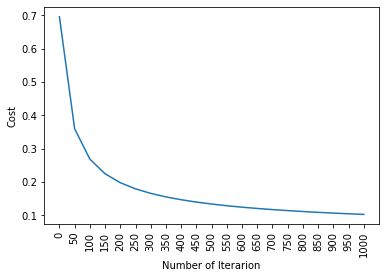

test accuracy: 95.0 %


In [503]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 1001)    



## Sklearn with LR

In [504]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

test accuracy 0.95


## Test

In [505]:
tahmin = np.array(tahmini_deger)
tahmin

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [506]:
y_test

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [507]:
Tahmin = np.concatenate((y_test,tahmin), axis=0)

Tahmin = Tahmin.reshape(2,20)

Tahmin

array([[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]])

In [508]:
x_test.T # Data in index 33 failed under LR.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
7,0.000000,0.222222,0.076923,0.000000
25,0.566667,0.555556,0.358974,0.266667
71,0.233333,0.444444,0.487179,0.666667
42,0.300000,0.333333,0.256410,0.133333
47,0.433333,0.500000,0.333333,0.200000
29,0.266667,0.333333,0.128205,0.000000
63,0.266667,0.277778,0.512821,0.666667
88,0.366667,0.555556,0.461538,0.533333
50,0.466667,0.722222,0.769231,1.000000
9,0.100000,0.388889,0.230769,0.266667


In [509]:
deger = x_test.T
deger = deger.reset_index() 
deger["Real_Values"] = ["Iris-versicolor" if each == 0 else "Iris-virginica" for each in y_test]
deger["Test_Values"] = ["Iris-versicolor" if each == 0 else "Iris-virginica" for each in tahmin]
deger["Success"] = -(y_test - tahmin)+1

deger

,index,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Real_Values,Test_Values,Success
0,7,0.000000,0.222222,0.076923,0.000000,Iris-virginica,Iris-virginica,1
1,25,0.566667,0.555556,0.358974,0.266667,Iris-virginica,Iris-virginica,1
2,71,0.233333,0.444444,0.487179,0.666667,Iris-versicolor,Iris-versicolor,1
3,42,0.300000,0.333333,0.256410,0.133333,Iris-virginica,Iris-virginica,1
4,47,0.433333,0.500000,0.333333,0.200000,Iris-virginica,Iris-virginica,1
5,29,0.266667,0.333333,0.128205,0.000000,Iris-virginica,Iris-virginica,1
6,63,0.266667,0.277778,0.512821,0.666667,Iris-versicolor,Iris-versicolor,1
7,88,0.366667,0.555556,0.461538,0.533333,Iris-versicolor,Iris-versicolor,1
8,50,0.466667,0.722222,0.769231,1.000000,Iris-versicolor,Iris-versicolor,1
9,9,0.100000,0.388889,0.230769,0.266667,Iris-virginica,Iris-virginica,1


## Referance

https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners